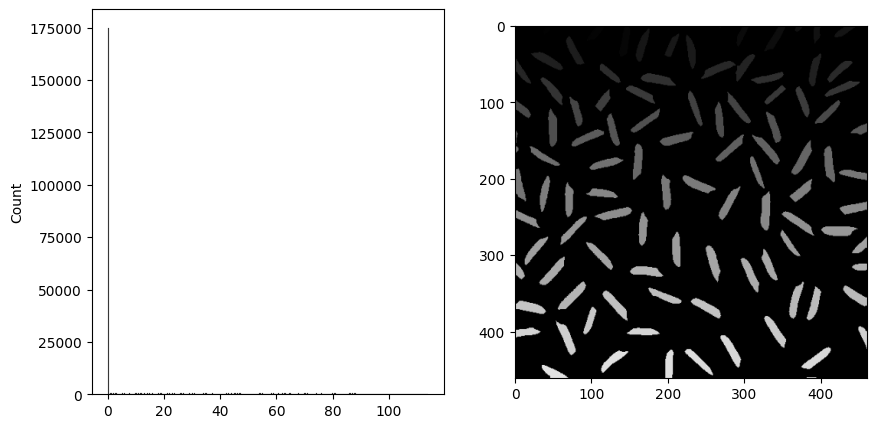

In [28]:
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
image = cv2.imread("./Images/1_2_4.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, fx = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(gray.ravel(), bins = 256, color='k', ax=fx[0])
fx[1].imshow(gray, cmap='gray')

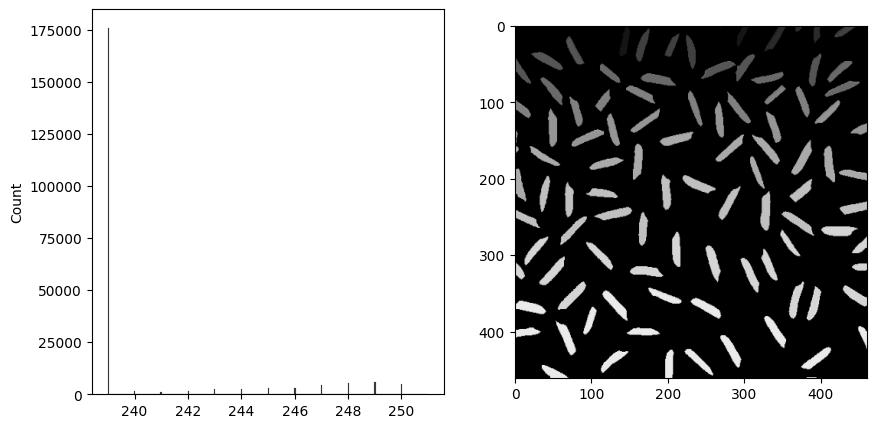

In [31]:
invGamma = 1.0/ 50
table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
img_adjusted = cv2.LUT(gray+10, table) 
# img_adjusted = cv2.equalizeHist(img_adjusted)
_, fx = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(img_adjusted.ravel(), bins = 256, color='k', ax=fx[0])
fx[1].imshow(img_adjusted, cmap='gray')

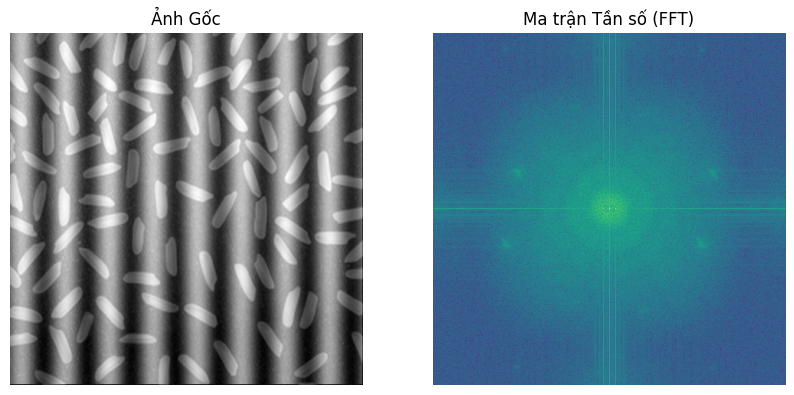

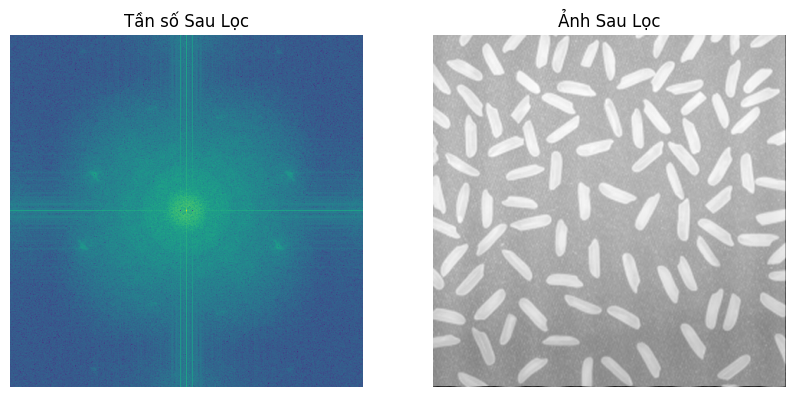

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Đọc ảnh gốc
img = cv2.imread('./Images/1_2_3.png', cv2.IMREAD_GRAYSCALE)

# 2. Chuyển sang miền tần số (FFT)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)  # Chuyển zero frequency về trung tâm
magnitude_spectrum = 20 * np.log(np.abs(fshift))  # Biến đổi log

# 3. Hiển thị ma trận miền tần số
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Ảnh Gốc'), plt.axis('off')
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='viridis')
plt.title('Ma trận Tần số (FFT)'), plt.axis('off')
plt.show()

# 4. Loại bỏ cực đại địa phương (theo mặt nạ)
is_max = np.zeros_like(fshift, dtype=bool)
crow, ccol = int(fshift.shape[0] / 2), int(fshift.shape[1] / 2)
is_max[crow, ccol-8]=True  # Cực đại
is_max[crow, ccol+8]=True  # Cực đại
filtered_fshift = np.copy(fshift)
filtered_fshift[is_max] = 0  # filtering

filtered_magnitude = 20 * np.log(np.abs(filtered_fshift) + 1)  # Biến đổi log

# 5. Chuyển ngược về miền không gian
f_ishift = np.fft.ifftshift(filtered_fshift)
img_back = np.abs(np.fft.ifft2(f_ishift))

# 6. Hiển thị ảnh đã xử lý
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(filtered_magnitude, cmap='viridis')
plt.title('Tần số Sau Lọc'), plt.axis('off')
plt.subplot(122), plt.imshow(img_back, cmap='gray')
plt.title('Ảnh Sau Lọc'), plt.axis('off')
plt.show()


In [2]:
import cv2
import numpy as np

img = cv2.imread('Images/Chessboard_3.png')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Hough Line Transform
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)
cnt = 0
for line in lines:
    cnt += 1
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

print(cnt)
# Display the image
cv2.imshow('Hough Lines', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

9
